# 1 by N toy data

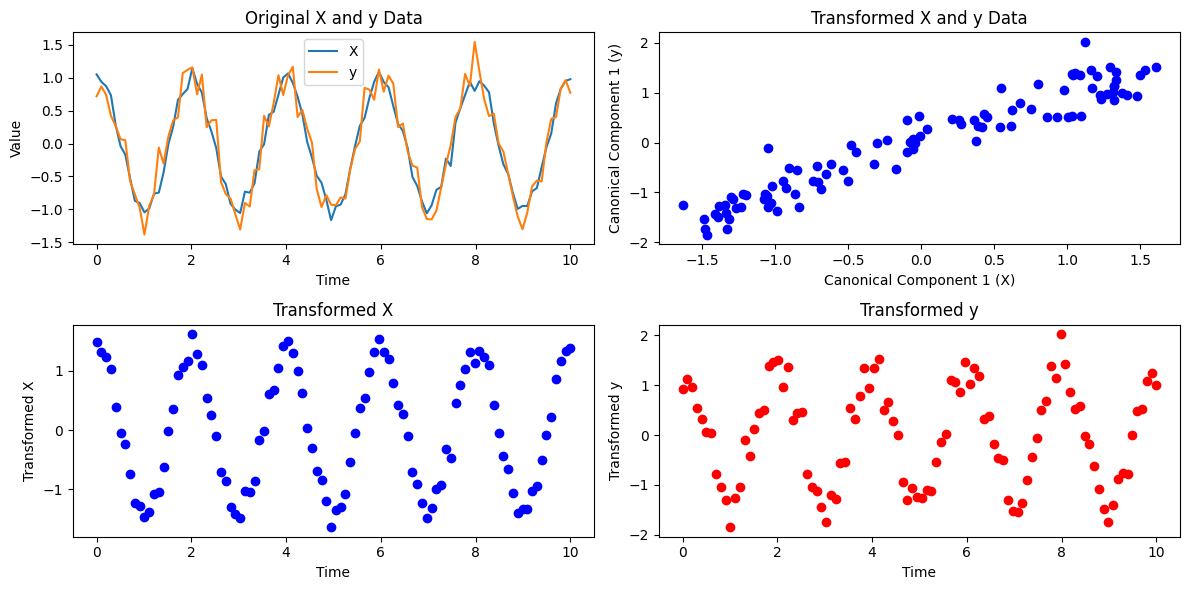

The correlation coefficient between X and y is: 0.96


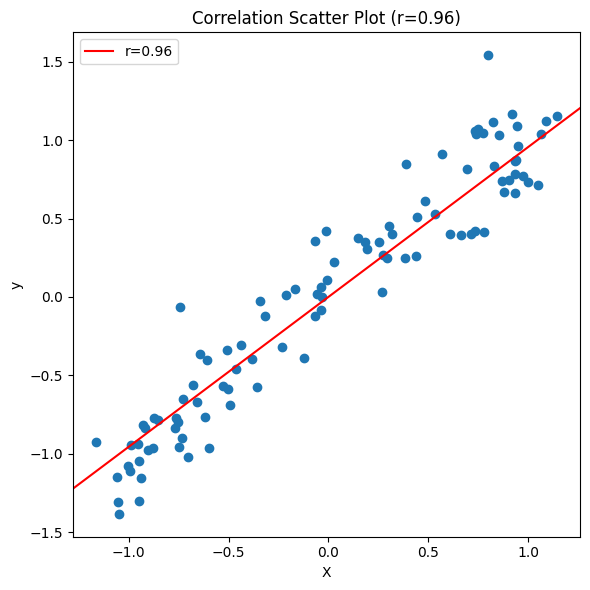

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

# Generate synthetic time series data
np.random.seed(42)
t = np.linspace(0, 10, 100)
X = np.cos(2 * np.pi * 0.5 * t) + 0.1 * np.random.randn(len(t))
y = np.cos(2 * np.pi * 0.5 * t) + 0.2 * np.random.randn(len(t))

# Initialize and fit the CCA model
cca = CCA(n_components=1)
cca.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Transform the data using the fitted CCA model
X_c, Y_c = cca.transform(X.reshape(-1, 1), y.reshape(-1, 1))

# Plot the original and transformed data
plt.figure(figsize=(12, 6))

# Plot the original X and y data
plt.subplot(2, 2, 1)
plt.plot(t, X, label='X')
plt.plot(t, y, label='y')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original X and y Data')
plt.legend()

# Plot the transformed X and y data
plt.subplot(2, 2, 2)
plt.scatter(X_c, Y_c, c='b')
plt.xlabel('Canonical Component 1 (X)')
plt.ylabel('Canonical Component 1 (y)')
plt.title('Transformed X and y Data')

# Plot the transformed X data
plt.subplot(2, 2, 3)
plt.scatter(t, X_c, c='b')
plt.xlabel('Time')
plt.ylabel('Transformed X')
plt.title('Transformed X')

# Plot the transformed y data
plt.subplot(2, 2, 4)
plt.scatter(t, Y_c, c='r')
plt.xlabel('Time')
plt.ylabel('Transformed y')
plt.title('Transformed y')

plt.tight_layout()
plt.show()


# Calculate the correlation coefficient
corr_coef = np.corrcoef(X, y)[0, 1]
print(f"The correlation coefficient between X and y is: {corr_coef:.2f}")

# Plot the correlation scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Correlation Scatter Plot (r={corr_coef:.2f})')
plt.axline((0, 0), slope=corr_coef, color='r', label=f'r={corr_coef:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# 4 by N synthetic data

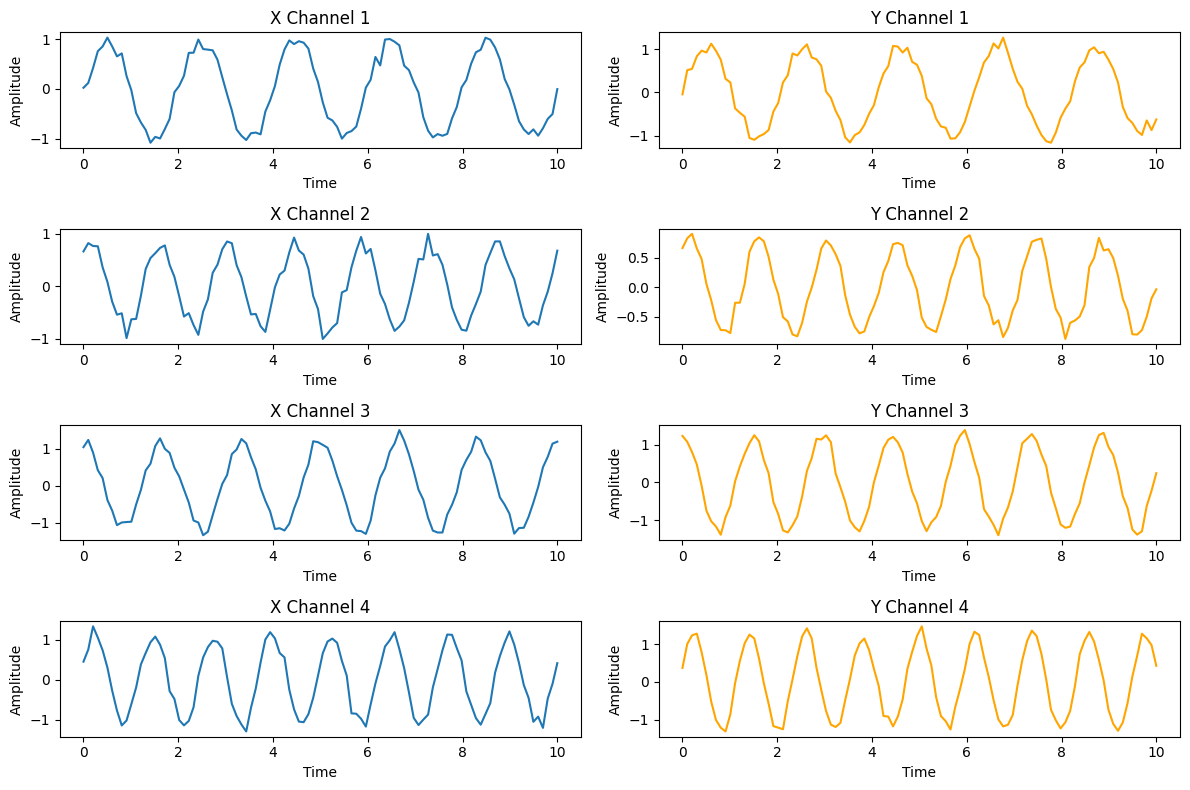

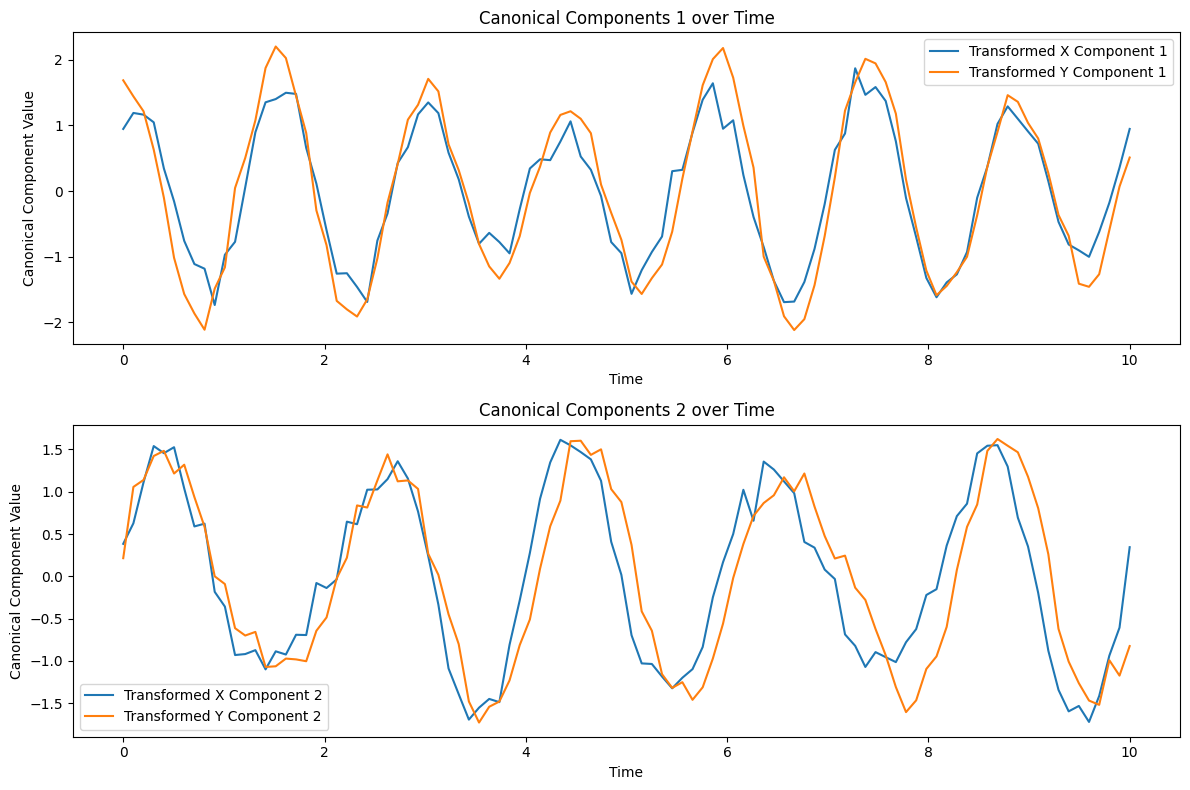

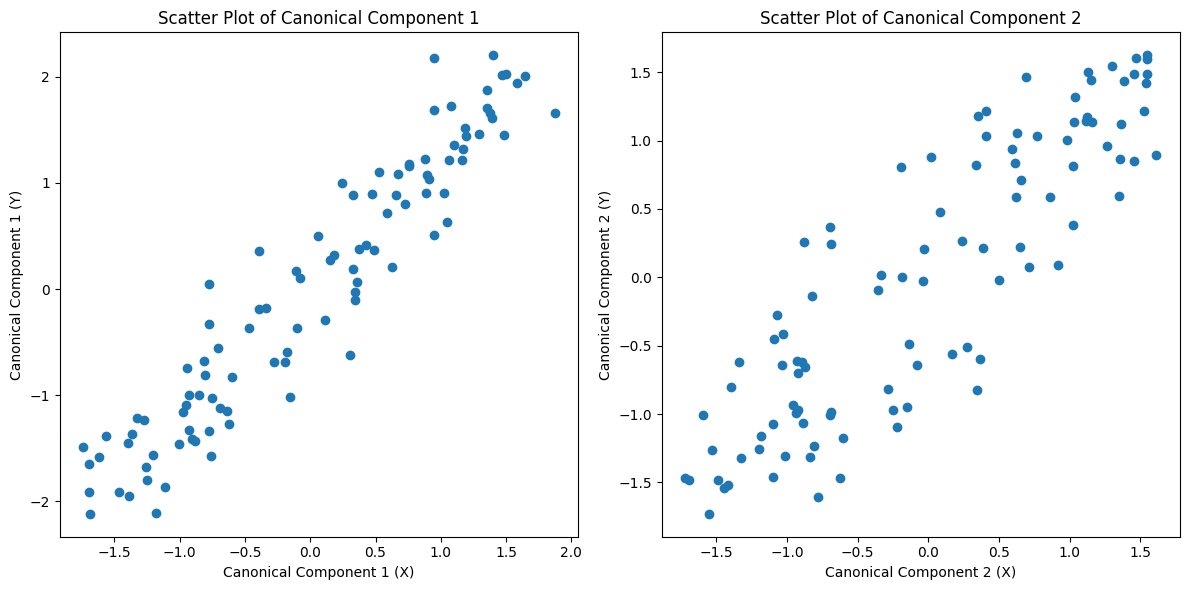

The canonical correlation coefficient for component 1 is: 0.95
The canonical correlation coefficient for component 2 is: 0.87


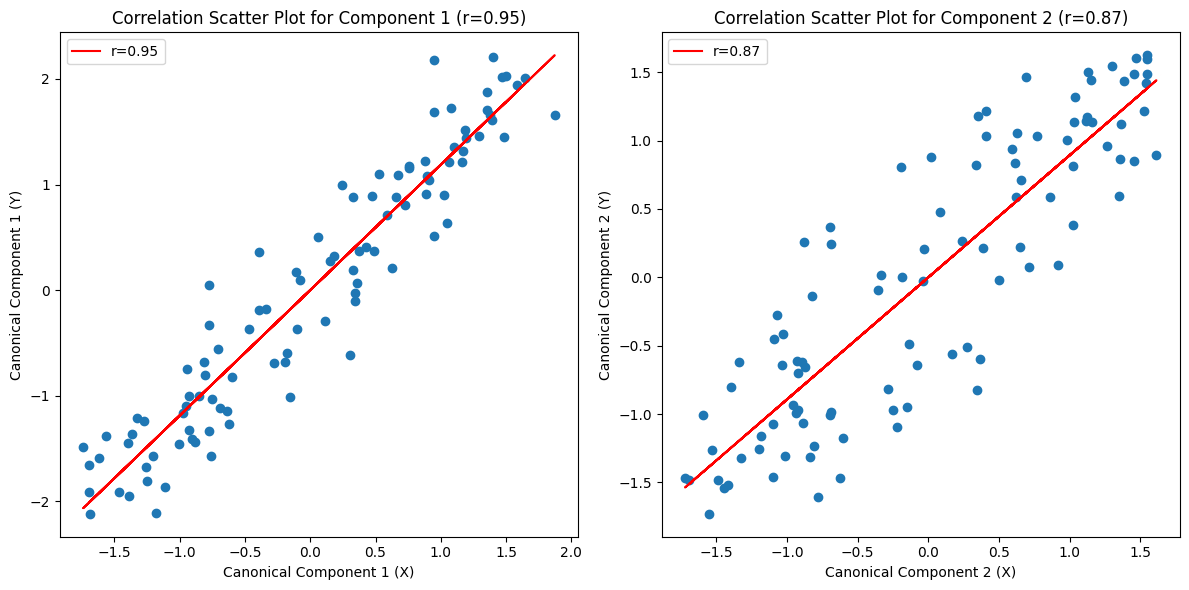

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

# Hyperparameter: number of components
n_components = 2  # Change this value as needed

# Generate synthetic time series data
np.random.seed(42)
t = np.linspace(0, 10, 100)
n_samples = len(t)
n_channels = 4

# Parameters for X
amplitudes_X = np.array([1.0, 0.8, 1.2, 1.1])
frequencies_X = np.array([0.5, 0.7, 0.6, 0.8])
phases_X = np.array([0, np.pi/4, np.pi/2, np.pi/8])

# Parameters for Y (slightly different to introduce variation)
amplitudes_Y = amplitudes_X + 0.1 * np.random.randn(n_channels)
frequencies_Y = frequencies_X + 0.05 * np.random.randn(n_channels)
phases_Y = phases_X + 0.1 * np.random.randn(n_channels)

# Generate X and Y data
X = np.zeros((n_samples, n_channels))
Y = np.zeros((n_samples, n_channels))

for i in range(n_channels):
    X[:, i] = amplitudes_X[i] * np.sin(2 * np.pi * frequencies_X[i] * t + phases_X[i]) + 0.1 * np.random.randn(n_samples)
    Y[:, i] = amplitudes_Y[i] * np.sin(2 * np.pi * frequencies_Y[i] * t + phases_Y[i]) + 0.1 * np.random.randn(n_samples)

# Initialize and fit the CCA model
cca = CCA(n_components=n_components)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)

# Plot the original X and Y data
fig, axs = plt.subplots(n_channels, 2, figsize=(12, 8))

for i in range(n_channels):
    axs[i, 0].plot(t, X[:, i])
    axs[i, 0].set_title(f'X Channel {i+1}')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Amplitude')

    axs[i, 1].plot(t, Y[:, i], color='orange')
    axs[i, 1].set_title(f'Y Channel {i+1}')
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot the transformed canonical components over time
fig, axs = plt.subplots(n_components, 1, figsize=(12, 4 * n_components))

for i in range(n_components):
    axs[i].plot(t, X_c[:, i], label=f'Transformed X Component {i+1}')
    axs[i].plot(t, Y_c[:, i], label=f'Transformed Y Component {i+1}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Canonical Component Value')
    axs[i].set_title(f'Canonical Components {i+1} over Time')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Plot the scatter plots of canonical components
fig, axs = plt.subplots(1, n_components, figsize=(6 * n_components, 6))

for i in range(n_components):
    axs[i].scatter(X_c[:, i], Y_c[:, i])
    axs[i].set_xlabel(f'Canonical Component {i+1} (X)')
    axs[i].set_ylabel(f'Canonical Component {i+1} (Y)')
    axs[i].set_title(f'Scatter Plot of Canonical Component {i+1}')

plt.tight_layout()
plt.show()

# Calculate the canonical correlation coefficients
canonical_corrs = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(n_components)]
for i, corr in enumerate(canonical_corrs):
    print(f"The canonical correlation coefficient for component {i+1} is: {corr:.2f}")

# Plot the correlation scatter plots with regression lines
fig, axs = plt.subplots(1, n_components, figsize=(6 * n_components, 6))

for i in range(n_components):
    corr_coef = canonical_corrs[i]
    axs[i].scatter(X_c[:, i], Y_c[:, i])
    axs[i].set_xlabel(f'Canonical Component {i+1} (X)')
    axs[i].set_ylabel(f'Canonical Component {i+1} (Y)')
    axs[i].set_title(f'Correlation Scatter Plot for Component {i+1} (r={corr_coef:.2f})')
    # Add regression line
    m, b = np.polyfit(X_c[:, i], Y_c[:, i], 1)
    axs[i].plot(X_c[:, i], m * X_c[:, i] + b, color='red', label=f'r={corr_coef:.2f}')
    axs[i].legend()

plt.tight_layout()
plt.show()
